In [ ]:
%%script true
# script true > skips cell when running
'''>>>>> start CodeP2.4F24
    V.P. Carey ME249, Fall 2024

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
xdata = []
'''xdata =  [[ 318.0, 0.0, 500.0], [ 318.0, 0.0, 1000.0]]
xdata.append([ 318.0, 0.0, 1500.0])
xdata.append([ 318.0, 0.0, 2000.0])
xdata.append([ 318.0, 0.0, 2500.0])'''
# convert to:
# meadian values of input variables
Tmed = 293.
gamed = 0.25
qsmed = 1250.
#T1(K), gamma, , qsol(kW):

xdata = []
ND = 60
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])
# add the rest here

xarray= np.array(xdata)
print (xdata)
print (xarray)

ydata = []
'''ydata =  [[ 35.1316, 0.3808], [ 40.3764, 0.38686]]
ydata.append([ 47.4620, 0.3930])
ydata.append([ 57.5639, 0.39949])
ydata.append([ 73.1286, 0.40612])'''
# convert to:
# meadian values of output variables
almed = 60.
efmed = 0.4
# alpha, effsys

ydata = []

ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])
# add the rest here

yarray= np.array(ydata)
print (ydata)
print (yarray)
data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

In [6]:
'''>>>>> start CodeP2.3F24
    V.P. Carey ME249, Fall 2024

Intro to Neural Network Modeling 
Data arrays for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import statistics
from pprint import pprint

#create input data array, normalizing input temp
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2501.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])

ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

# gather statistics of the data
# xdata order = T1(K), gamma, , qsol(kW):

t1 = []
gamma = []
qsol = []

for a, b, c, in xdata:
    t1.append(a)
    gamma.append(b)
    qsol.append(c)

air_ratio = []
eff = []

for ar, e in ydata:
    air_ratio.append(ar)
    eff.append(e)

t1_med = statistics.median(t1)
gamma_med = statistics.median(gamma)
qsol_med = statistics.median(qsol)

ar_med = statistics.median(air_ratio)
eff_med = statistics.median(eff)

# normalize data
normalized_input_data = []
normalized_output_data = []

for dp in xdata:
    t1, gamma, qsol = dp
    normalized_input_data.append([t1/t1_med, gamma/gamma_med, qsol/qsol_med])

for ar, e in ydata:
    normalized_output_data.append([ar/ar_med, e/eff_med])

original_input = xdata
original_output = ydata

xdata = normalized_input_data
ydata = normalized_output_data

# export data to be used by the rest of the program
xarray= np.array(xdata)
yarray= np.array(ydata)

data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

In [7]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2 > -0.9 to 0.9
initializer = keras.initializers.RandomUniform(minval= -0.9, maxval=0.9)

model = keras.Sequential([
    keras.layers.Dense(4, activation="elu", input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation="elu",  kernel_initializer=initializer),
    keras.layers.Dense(4, activation="elu", kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])
'''in Task 2.2, add 3rd layer to network with 4 neurons and activation = K.relu'''
#Print summary of model features
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [8]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers. Argument to RMSprop is learning parameter.
rms = keras.optimizers.RMSprop(0.001) # 0.020 > 0.001
model.compile(loss='mean_absolute_error',optimizer=rms)


In [32]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es]) # epochs 800 > 600

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

predictions = model.predict(data_inputs)

Epoch 1/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 2/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 3/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 4/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 5/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 6/800
2/2 [==============================] - 0s 16ms/step - loss: 0.0161
Epoch 7/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 8/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 9/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 10/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 11/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 12/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 13/800
2/2 [==============================] - 0s 1ms/s

1/1 [==============================] - 0s 20ms/step


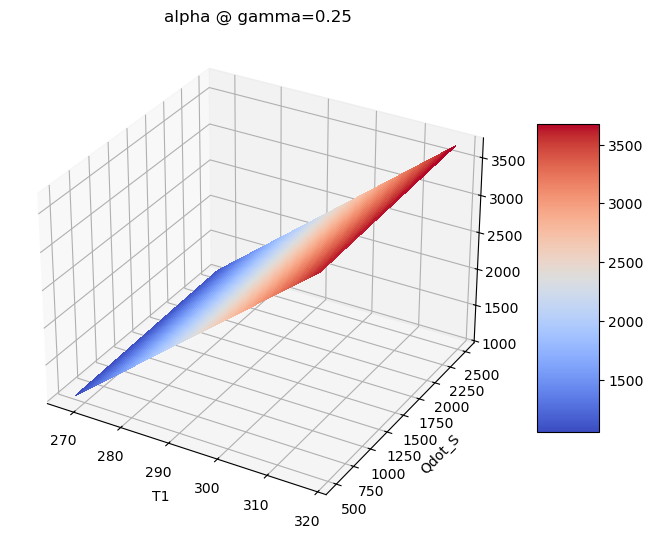

In [58]:
"""
test=[]
outpt=[]
predictions = model.predict(data_inputs)

#first point (row [0])comparison of data and prediction
# put in a loop to print comparion for all data points

'''
from our calculations:
t1_med = statistics.median(t1)
gamma_med = statistics.median(gamma)
qsol_med = statistics.median(qsol)

ar_med = statistics.median(air_ratio)
eff_med = statistics.median(eff)
'''

test = [[ xarray[0][0] , xarray[0][1] , xarray[0][2] ]]
testarray = np.array(test)
outpt = model.predict(testarray)
print ('row [0] data:  T1= ', xarray[0][0]*t1_med, ', gam= ', xarray[0][1]*gamma_med, \
    ', qsol= ', xarray[0][2]*qsol_med,', alpha= ', yarray[0][0]*ar_med,\
    ',  predicted alpha = ', outpt[0][0]*eff_med)

#SETTING UP PLOT
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas 
#========

'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''

plt.scatter(predictions[:, 0], data_outputs[:, 0])
plt.title('plot title')
plt.xlabel('predicted output for NN (units)') 
plt.ylabel('data output (units)')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()
"""

'''SURFACE PLOT (alpha as fn of T1, Qdot_S. gamma set at 0.25)'''
from matplotlib import cm
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
T1_test = np.linspace(268, 318, 50)
Qdot_S_test = np.linspace(500, 2500, 50)
gamma_const = 0.25
X, Y = np.meshgrid(T1_test, Qdot_S_test)
Z = np.zeros((len(T1_test),len(Qdot_S_test)))

for i in range(len(T1_test)):
    for j in range(len(Qdot_S_test)):
        Z[i, j] = model.predict([[T1_test[i], gamma_const, Qdot_S_test[j]]])[0][0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.xlabel('T1', fontsize=10)
plt.ylabel('Qdot_S', fontsize=10)
plt.title('alpha @ gamma=0.25')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()